# Homework 3 -- Option #2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

# we won't use these packages directly, but the function that picks colors will
import scipy
import scipy.misc
import scipy.cluster

# If you haven't yet, you may need to install scipy
#!conda install -c anaconda scipy


# NOTE: I am not expecting you to know how to write these on your own!
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

## Image 1

In [2]:
im = Image.open('spring.png')

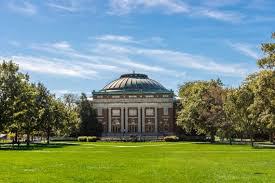

In [3]:
im

In [4]:
new_im, new_rgbs = convert_image(im, ncolors = 10)

finding 10 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[159.49779951 159.65427873 130.82836186]
 [133.79418323 157.01619001  18.2637906 ]
 [ 60.04446309  58.80348154  38.06291946]
 [102.58625138 163.25248802 217.19166974]
 [164.59957563 197.02379509 227.36359503]
 [203.27256944 220.55833333 237.98472222]
 [ 28.54070922  28.55035461  13.54297872]
 [127.59946985 176.30735586 222.77137177]
 [124.52796353 121.37629179  94.04224924]
 [ 91.26875159  89.10577168  62.62725655]]


In [5]:
im_data = np.array(new_im)
im_data.shape   # '3' means that this image only have three channels which are 'R', 'G', 'B'

(183, 275, 3)

In [6]:
np.unique(im_data)

array([ 14,  18,  29,  38,  59,  60,  63,  89,  91,  94, 103, 121, 125,
       128, 131, 134, 157, 159, 160, 163, 165, 176, 197, 203, 217, 221,
       223, 227, 238], dtype=uint8)

In [7]:
channel_labels = ['R', 'G', 'B']
for i in range(im_data.shape[2]): # this loops over the last entry of the shape array, so the #3
    print('channel=', channel_labels[i], 
          'unique values=', np.unique( im_data[:,:,i] ) ) # print the unique elements in each channel

channel= R unique values= [ 29  60  91 103 125 128 134 159 165 203]
channel= G unique values= [ 29  59  89 121 157 160 163 176 197 221]
channel= B unique values= [ 14  18  38  63  94 131 217 223 227 238]


In [8]:
im_data.reshape(-1, im_data.shape[2])

array([[103, 163, 217],
       [103, 163, 217],
       [128, 176, 223],
       ...,
       [134, 157,  18],
       [134, 157,  18],
       [134, 157,  18]], dtype=uint8)

In [9]:
np.unique(im_data.reshape(-1, im_data.shape[2]), axis=0)

array([[ 29,  29,  14],
       [ 60,  59,  38],
       [ 91,  89,  63],
       [103, 163, 217],
       [125, 121,  94],
       [128, 176, 223],
       [134, 157,  18],
       [159, 160, 131],
       [165, 197, 227],
       [203, 221, 238]], dtype=uint8)

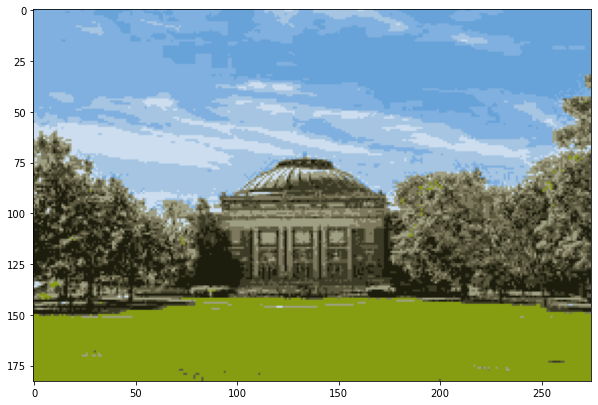

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.imshow(im_data) # use imshow function with "ax" object

plt.show() # this gets rid of the print memory address thing

In [11]:
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(im_data.reshape(-1, im_data.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = im_data[:,:,0] == rgba[0]
    greens_mask = im_data[:,:,1] == rgba[1]
    blues_mask = im_data[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # grab number of pixels
    this_color_pixels = im_data[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )

In [12]:
colors

[array([0.11372549, 0.11372549, 0.05490196]),
 array([0.23529412, 0.23137255, 0.14901961]),
 array([0.35686275, 0.34901961, 0.24705882]),
 array([0.40392157, 0.63921569, 0.85098039]),
 array([0.49019608, 0.4745098 , 0.36862745]),
 array([0.50196078, 0.69019608, 0.8745098 ]),
 array([0.5254902 , 0.61568627, 0.07058824]),
 array([0.62352941, 0.62745098, 0.51372549]),
 array([0.64705882, 0.77254902, 0.89019608]),
 array([0.79607843, 0.86666667, 0.93333333])]

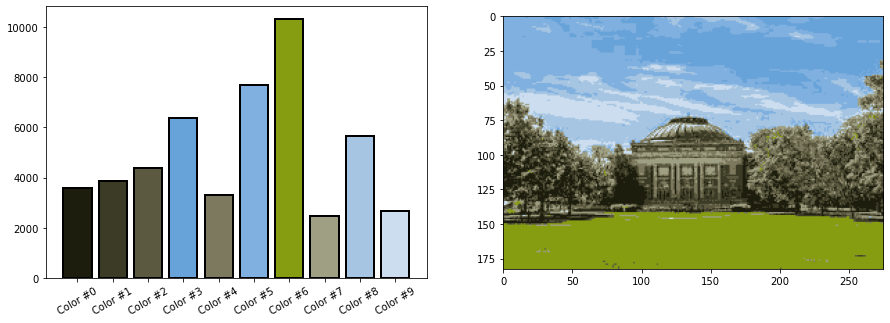

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color)

for tick in ax[0].get_xticklabels():  # To prevent the labels from overlapping, rotate them 30 degrees apart
    tick.set_rotation(30)
    
# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') 
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

ax[1].imshow(im_data)    
    
plt.show()

* This image show the Foellinger Auditorium in the spring. As we know, when spring is coming, trees and grass turn green again. This histogram also shows that two colors, blue and green, make up half of this image.

## Image 2

In [14]:
im_2 = Image.open('winter.png')

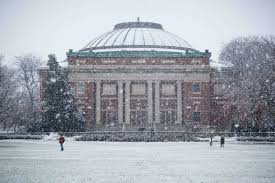

In [15]:
im_2

In [16]:
new_im_2, new_rgbs_2 = convert_image(im_2, ncolors = 10)

finding 10 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[136.71815182 140.2129813  148.68250825]
 [ 99.70263006 100.20483778 108.39585333]
 [117.56891229 119.94189214 128.45396768]
 [196.84201709 203.95560395 211.81571453]
 [158.08380139 161.48505954 168.36486183]
 [226.27229783 233.47688674 239.88977618]
 [210.20619469 217.1679941  224.67153392]
 [ 46.11746805  51.41265977  60.73584906]
 [ 76.92118621  78.7507347   87.3318194 ]
 [176.70476721 184.49930304 191.76498467]]


In [17]:
im_data_2 = np.array(new_im_2)
im_data_2.shape  # '3' means that this image only have three channels which are 'R', 'G', 'B'

(183, 275, 3)

In [18]:
channel_labels = ['R', 'G', 'B']
for i in range(im_data_2.shape[2]): # this loops over the last entry of the shape array, so the #3
    print('channel=', channel_labels[i], 
          'unique values=', np.unique( im_data_2[:,:,i] ) ) # print the unique elements in each channel

channel= R unique values= [ 46  77 100 118 137 158 177 197 210 226]
channel= G unique values= [ 51  79 100 120 140 161 184 204 217 233]
channel= B unique values= [ 61  87 108 128 149 168 192 212 225 240]


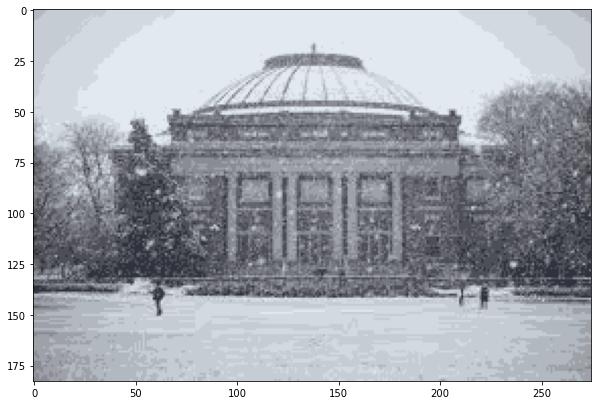

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.imshow(im_data_2) # use imshow function with "ax" object

plt.show() # this gets rid of the print memory address thing

In [20]:
number_of_pixels_of_a_color_2 = []
color_labels_2 = []
colors_2 = []
for icolor,rgba in enumerate(np.unique(im_data_2.reshape(-1, im_data_2.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask_2 = im_data_2[:,:,0] == rgba[0]
    greens_mask_2 = im_data_2[:,:,1] == rgba[1]
    blues_mask_2 = im_data_2[:,:,2] == rgba[2]

    # combined mask
    pixel_mask_2 = reds_mask_2 & greens_mask_2 & blues_mask_2
    
    # grab number of pixels
    this_color_pixels_2 = im_data_2[pixel_mask_2]
    number_of_pixels_of_a_color_2.append(len(this_color_pixels_2))
    # this could be done better...
    color_labels_2.append( 'Color #' + str(icolor) )
    
    colors_2.append( rgba/255 )

In [21]:
colors_2

[array([0.18039216, 0.2       , 0.23921569]),
 array([0.30196078, 0.30980392, 0.34117647]),
 array([0.39215686, 0.39215686, 0.42352941]),
 array([0.4627451 , 0.47058824, 0.50196078]),
 array([0.5372549 , 0.54901961, 0.58431373]),
 array([0.61960784, 0.63137255, 0.65882353]),
 array([0.69411765, 0.72156863, 0.75294118]),
 array([0.77254902, 0.8       , 0.83137255]),
 array([0.82352941, 0.85098039, 0.88235294]),
 array([0.88627451, 0.91372549, 0.94117647])]

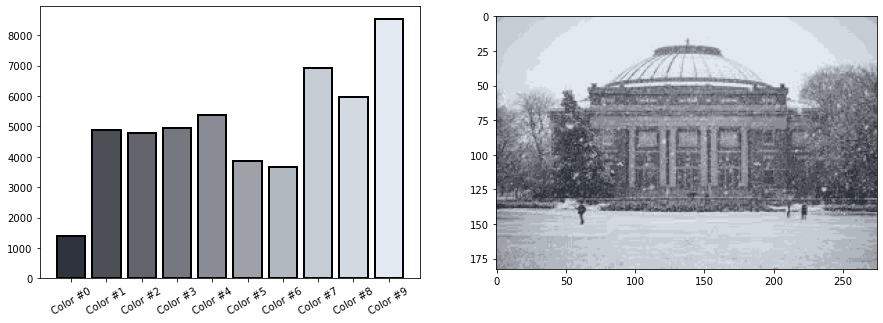

In [22]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

myBarChart_2 = ax[0].bar(color_labels_2, number_of_pixels_of_a_color_2)

for tick in ax[0].get_xticklabels():  # To prevent the labels from overlapping, rotate them 30 degrees apart
    tick.set_rotation(30)
    
# set colors for each bar individually
for i in range(len(myBarChart_2)):
    myBarChart_2[i].set_color(colors_2[i])
    myBarChart_2[i].set_edgecolor('black')
    myBarChart_2[i].set_linewidth(2) # so we can see the outlines clearly

ax[1].imshow(im_data_2) 
    
plt.show()

* This image show the Foellinger Auditorium in the winter. Snow is the most representative feature of winter. And we can see that in this histogram, many colors that are similar to white which represent the snow. 

## Image 3

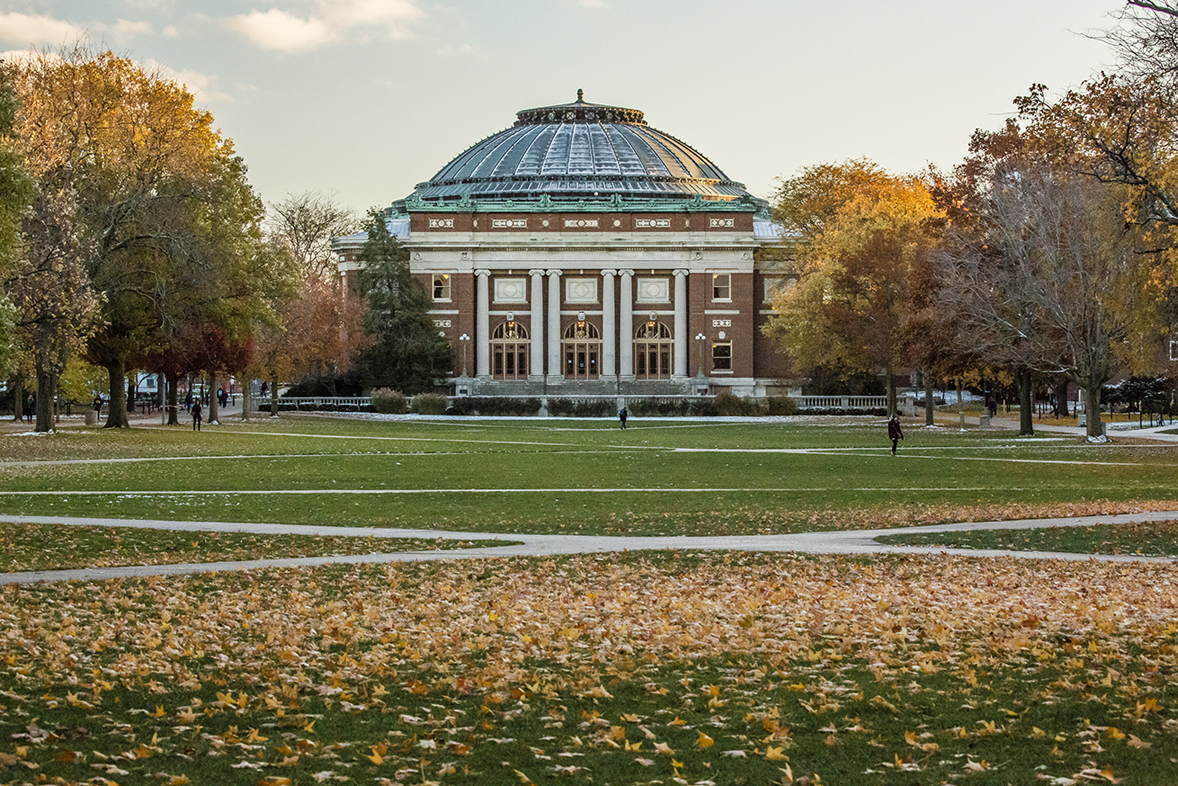

In [23]:
im_3 = Image.open('autumn.png')
im_3

In [24]:
new_im_3, new_rgbs_3 = convert_image(im_3, ncolors = 10)

finding 10 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[ 32.94393691  30.93300104  17.41660467]
 [114.91786216 102.14376351  62.21390311]
 [ 88.0707132   83.06370779  46.23240336]
 [ 61.79358889  59.68270364  30.38853249]
 [228.53728027 229.76191683 220.88703862]
 [208.1907086  210.22770628 200.55138348]
 [159.98714265 125.61718183  73.25266289]
 [120.44330012 125.2845137  114.68621681]
 [179.12764157 154.33081837 117.80894337]
 [176.90150013 178.61473813 171.03665234]]


In [25]:
im_data_3 = np.array(new_im_3)
im_data_3.shape  # '3' means that this image only have three channels which are 'R', 'G', 'B'

(786, 1178, 3)

In [26]:
channel_labels = ['R', 'G', 'B']
for i in range(im_data_3.shape[2]): # this loops over the last entry of the shape array, so the #3
    print('channel=', channel_labels[i], 
          'unique values=', np.unique( im_data_3[:,:,i] ) ) # print the unique elements in each channel

channel= R unique values= [ 33  62  88 115 120 160 177 179 208 229]
channel= G unique values= [ 31  60  83 102 125 126 154 179 210 230]
channel= B unique values= [ 17  30  46  62  73 115 118 171 201 221]


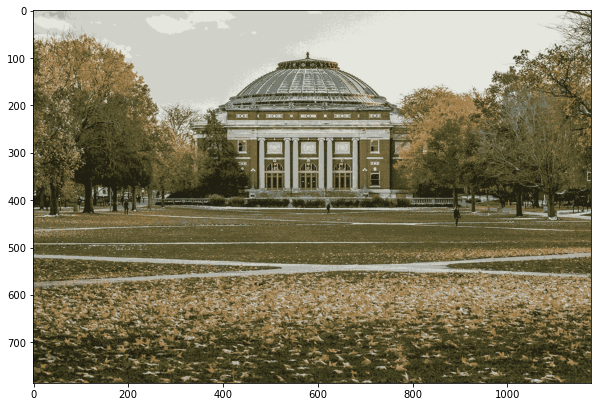

In [27]:
fig, ax = plt.subplots(figsize=(10,10)) # generate a "fig" and "ax" object

ax.imshow(im_data_3) # use imshow function with "ax" object

plt.show() # this gets rid of the print memory address thing

In [28]:
number_of_pixels_of_a_color_3 = []
color_labels_3 = []
colors_3 = []
for icolor,rgba in enumerate(np.unique(im_data_3.reshape(-1, im_data_3.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask_3 = im_data_3[:,:,0] == rgba[0]
    greens_mask_3 = im_data_3[:,:,1] == rgba[1]
    blues_mask_3 = im_data_3[:,:,2] == rgba[2]

    # combined mask
    pixel_mask_3 = reds_mask_3 & greens_mask_3 & blues_mask_3
    
    # grab number of pixels
    this_color_pixels_3 = im_data_3[pixel_mask_3]
    number_of_pixels_of_a_color_3.append(len(this_color_pixels_3))
    # this could be done better...
    color_labels_3.append( 'Color #' + str(icolor) )
    
    colors_3.append( rgba/255 )

In [29]:
colors_3

[array([0.12941176, 0.12156863, 0.06666667]),
 array([0.24313725, 0.23529412, 0.11764706]),
 array([0.34509804, 0.3254902 , 0.18039216]),
 array([0.45098039, 0.4       , 0.24313725]),
 array([0.47058824, 0.49019608, 0.45098039]),
 array([0.62745098, 0.49411765, 0.28627451]),
 array([0.69411765, 0.70196078, 0.67058824]),
 array([0.70196078, 0.60392157, 0.4627451 ]),
 array([0.81568627, 0.82352941, 0.78823529]),
 array([0.89803922, 0.90196078, 0.86666667])]

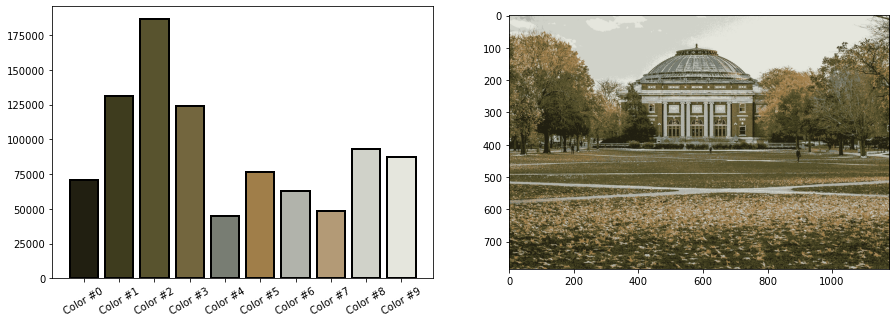

In [30]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

myBarChart_3 = ax[0].bar(color_labels_3, number_of_pixels_of_a_color_3) 

for tick in ax[0].get_xticklabels():  # To prevent the labels from overlapping, rotate them 30 degrees apart
    tick.set_rotation(30)
    
# set colors for each bar individually
for i in range(len(myBarChart_3)):
    myBarChart_3[i].set_color(colors_3[i])
    myBarChart_3[i].set_edgecolor('black') 
    myBarChart_3[i].set_linewidth(2) # so we can see the outlines clearly

ax[1].imshow(im_data_3)
    
plt.show()

* This image show the Foellinger Auditorium in the autumn. When autumn is coming, leaves turn yellow and fall. We can see that in this image there are so many yellow leaves fall on the ground. Then we can find some colors like Color #5 and Color #7 in this histogram which are very close to brown.

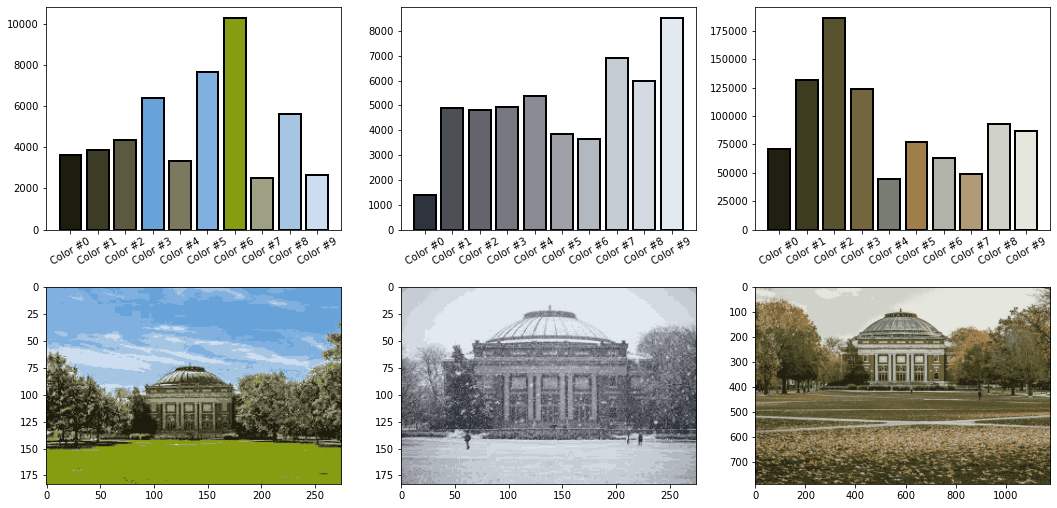

In [31]:
fig, ax = plt.subplots(2,3,figsize=(18,9))

myBarChart = ax[0][0].bar(color_labels, number_of_pixels_of_a_color)
myBarChart_2 = ax[0][1].bar(color_labels_2, number_of_pixels_of_a_color_2)
myBarChart_3 = ax[0][2].bar(color_labels_3, number_of_pixels_of_a_color_3)

for tick in ax[0][0].get_xticklabels():  # To prevent the labels from overlapping, rotate them 30 degrees apart
    tick.set_rotation(30)

for tick in ax[0][1].get_xticklabels():  # To prevent the labels from overlapping, rotate them 30 degrees apart
    tick.set_rotation(30)    

for tick in ax[0][2].get_xticklabels():  # To prevent the labels from overlapping, rotate them 30 degrees apart
    tick.set_rotation(30)
    
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') 
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly
    
for i in range(len(myBarChart_2)):
    myBarChart_2[i].set_color(colors_2[i])
    myBarChart_2[i].set_edgecolor('black') 
    myBarChart_2[i].set_linewidth(2) # so we can see the outlines clearly
    
for i in range(len(myBarChart_3)):
    myBarChart_3[i].set_color(colors_3[i])
    myBarChart_3[i].set_edgecolor('black') 
    myBarChart_3[i].set_linewidth(2) # so we can see the outlines clearly
    
ax[1][0].imshow(im_data)
ax[1][1].imshow(im_data_2)
ax[1][2].imshow(im_data_3)

plt.show()

* These three images show the Foellinger Auditorium at UIUC in different seasons. Each season has their own specific feature. For spring is green grass, for autumn is golden leaves and winter is full of snow. Using histograms to compare these three images we can notice that 'Green', 'White' and 'Brown' are the most popular colors in ‘spring’, ‘winter’, and ‘autumn' images respectively.

<font size=4>**Both of the color re-mappings presented in this notebook are not perfect.  What are some issues you can think of in how color is rebinned from a full color image into an image with less colors with the functions provided?**

* When an image includes thousands of different colors and the gap between them is huge, it is difficult to just use little colors to represent the full color image. After color re-mappings, the image may be difficult to be recognized the object. 

* It is difficult to determine the number of colors you want to use to do color re-mappings. The number of colors determines the quality of the result. For different purpose, we should choose different numbers. 